temperature profile:


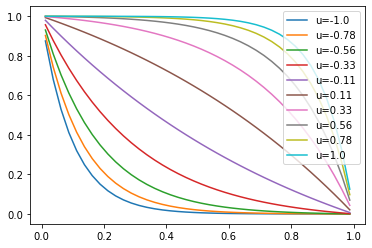

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import Odin

# in this test I want to test the update() function of fields. When I change the velocity, the backend matrices must be updated

# geometric parameters
LenX = 1
LenY = 0.2
resolution = 40

# thermal conductivity [ W / (m K) ]
k = 0.1

# const temperature at left/right boundaries [K]
T_l = 1
T_r = 0

geom = Odin.createGeometry( 'rectangle', [LenX, LenY] )
mesh = Odin.createMesh( geom, res=resolution )

myFlowModels = {
    'T' : Odin.TransportModels.scalarTransport
}

passiveFields = {
    'u' : 'faces_u',
    'v' : 'faces_v'
}

sim1 = Odin.Simulation(myFlowModels, mesh, geom, passiveFields=passiveFields )

myFields = sim1.fieldRegistry
T = myFields['T']
Odin.defineBoundaryCondition(field=T, boundaryName='top', type='zeroGradient')
Odin.defineBoundaryCondition(field=T, boundaryName='bottom', type='zeroGradient')
Odin.defineBoundaryCondition(field=T, boundaryName='left', type='fixedValue', value=T_l )
Odin.defineBoundaryCondition(field=T, boundaryName='right', type='fixedValue', value=T_r )

#Odin.updateSource(field=T, value=0.0, mesh=mesh)

T.govModel.setDiffusionCoefficient(value=k)

print("temperature profile:")
import matplotlib.pyplot as plt

nbcellsX = sim1.mesh.cells_x
cellSpacing = sim1.mesh.uniformSpacing
L = geom.lenX
xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX)
ax = plt.gca()

#print(myFields)

u = myFields['u']
for u_value in np.linspace(-1,1,10):
    u.data.fill(u_value)

    T.data = Odin.solve(T)
    ySim = T.data[0,:]
    ax.plot(xSim, ySim, '-', label="u={u_value:.2}".format(**locals()))

plt.legend()
plt.show()

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)